In [144]:
import gym
import ppaquette_gym_doom
import numpy as np
from ppaquette_gym_doom.wrappers import SetResolution, ToDiscrete

# (see https://github.com/ppaquette/gym-doom/blob/master/ppaquette_gym_doom/doom_basic.py)
def create_env():
    return SetResolution('200x150')(
        ToDiscrete('minimal')(gym.make('ppaquette/DoomBasic-v0')))

env = create_env()
WIDTH, HEIGHT = env.screen_width, env.screen_height

_, SHOOT, LEFT, RIGHT = 0, 1, 2, 3

[2017-03-02 08:42:36,684] Making new env: ppaquette/DoomBasic-v0


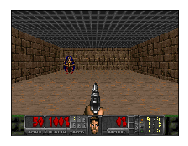

In [193]:
from matplotlib import pyplot as plt
%matplotlib inline

_ = env.reset()
obs, _, _, _ = env.step(action=1)

plt.figure(figsize=[3, 3])

def show(observation):
    plt.imshow(observation, interpolation=None)
    plt.xticks([]); plt.yticks([]);
    
show(obs)

## Random policy

[2017-03-02 09:03:04,697] Making new env: ppaquette/DoomBasic-v0
[2017-03-02 09:03:04,710] DEPRECATION WARNING: env.spec.timestep_limit has been deprecated. Replace your call to `env.spec.timestep_limit` with `env.spec.tags.get('wrapper_config.TimeLimit.max_episode_steps')`. This change was made 12/28/2016 and is included in version 0.7.0
[2017-03-02 09:03:04,711] Clearing 8 monitor files from previous run (because force=True was provided)
[2017-03-02 09:03:05,050] Starting new video recorder writing to /Users/gui/Dev/rl-study/tmp/random/openaigym.video.8.1555.video000000.mp4
[2017-03-02 09:03:05,191] Starting new video recorder writing to /Users/gui/Dev/rl-study/tmp/random/openaigym.video.8.1555.video000001.mp4
[2017-03-02 09:03:06,116] Starting new video recorder writing to /Users/gui/Dev/rl-study/tmp/random/openaigym.video.8.1555.video000008.mp4
[2017-03-02 09:03:06,328] Finished writing results. You can upload them to the scoreboard via gym.upload('/Users/gui/Dev/rl-study/tmp/rando

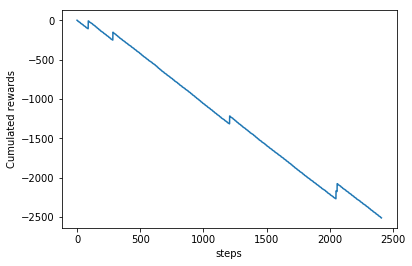

In [152]:
from gym import wrappers
from collections import namedtuple
import operator

SARE = namedtuple('SAR', ['state', 'action', 'reward', 'end'])


def play_episodes(env, agent, episode_count=100, max_episode_steps=10000, outdir=None, seed=None):
    if outdir is not None:
        env = wrappers.Monitor(env, directory=outdir, force=True)
    if seed is not None:
        env.seed(seed)

    reward = 0
    done = False

    for i in range(episode_count):
        observation = env.reset()
        while True:
            action = agent.act(observation, reward, done)
            new_observation, reward, done, _ = env.step(action)
            yield SARE(observation, action, reward, done)
            
            if done:
                break
            else:
                observation = new_observation
    env.close()
    
class RandomAgent(object):
    def __init__(self, action_space):
        self.action_space = action_space
        
    def act(self, observation, reward, done):
        return self.action_space.sample()
    
env = SetResolution('200x150')(
    ToDiscrete('minimal')(gym.make('ppaquette/DoomBasic-v0')))

sares = list(play_episodes(env, RandomAgent(env.action_space), episode_count=10, outdir='tmp/random'))
plt.plot(np.cumsum(list(map(operator.attrgetter('reward'), sares))));
plt.xlabel('steps'); plt.ylabel('Cumulated rewards')

## Understanding action and reward delay 

In [5]:
rewarding_indexes = [i for i, s in enumerate(sares) if s.reward > 0]

[(id, a, r, e) for id, (s, a, r, e) in [(i+d, sares[i + d]) for i in rewarding_indexes for d in range(-4, 1)]]

[(633, 1, -1.0, False),
 (634, 2, -1.0, False),
 (635, 3, -1.0, False),
 (636, 2, -1.0, False),
 (637, 1, 100.0, True),
 (1382, 1, -1.0, False),
 (1383, 3, -1.0, False),
 (1384, 1, -1.0, False),
 (1385, 3, -1.0, False),
 (1386, 1, 100.0, True),
 (1661, 1, -1.0, False),
 (1662, 0, -1.0, False),
 (1663, 0, -1.0, False),
 (1664, 0, -1.0, False),
 (1665, 1, 100.0, True),
 (1667, 1, -1.0, False),
 (1668, 1, -1.0, False),
 (1669, 3, -1.0, False),
 (1670, 1, -1.0, False),
 (1671, 3, 100.0, True),
 (1899, 1, -1.0, False),
 (1900, 1, -1.0, False),
 (1901, 3, -1.0, False),
 (1902, 1, -1.0, False),
 (1903, 0, 100.0, True)]

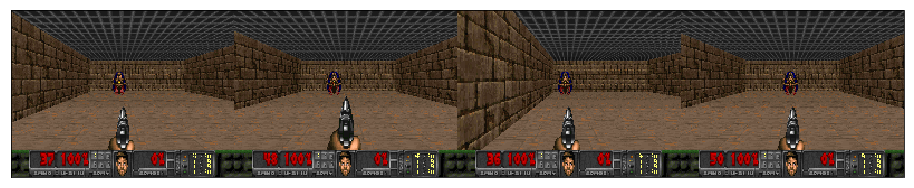

In [6]:
delta_fire = -4

plt.figure(figsize=[16, 16])
show(np.hstack([sares[i-4].state for i in rewarding_indexes[:4]]))

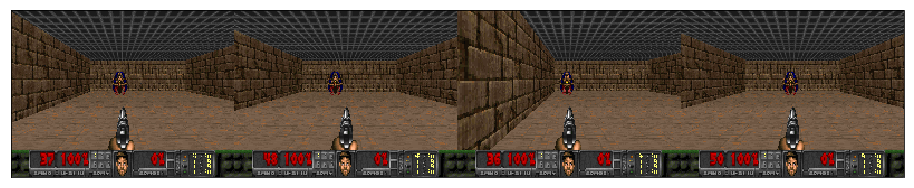

In [7]:
plt.figure(figsize=[16, 16])
show(np.hstack([sares[i].state for i in rewarding_indexes[:4]]))

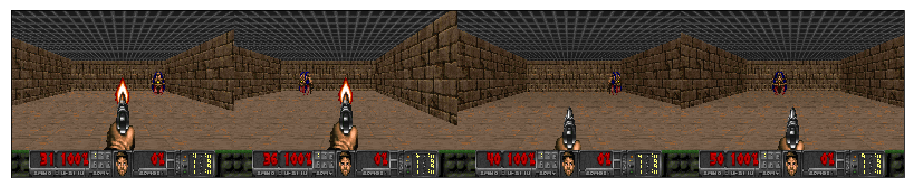

In [8]:
misses_indexes = [i for i, sar in enumerate(sares) if (sar.action == 1) and (sar.reward < 0)]

images = [sares[i].state for i in np.random.choice(misses_indexes, 4)]

plt.figure(figsize=[16, 16])
show(np.hstack(images))

## Collecting successful and missed shoot frames

[2017-02-25 09:57:47,597] Making new env: ppaquette/DoomBasic-v0
[2017-02-25 09:57:47,607] DEPRECATION WARNING: env.spec.timestep_limit has been deprecated. Replace your call to `env.spec.timestep_limit` with `env.spec.tags.get('wrapper_config.TimeLimit.max_episode_steps')`. This change was made 12/28/2016 and is included in version 0.7.0
[2017-02-25 09:57:47,608] Clearing 8 monitor files from previous run (because force=True was provided)
[2017-02-25 09:57:47,935] Starting new video recorder writing to /Users/gui/Dev/rl-study/tmp/random_strafing/openaigym.video.1.1555.video000000.mp4
[2017-02-25 09:57:48,209] Starting new video recorder writing to /Users/gui/Dev/rl-study/tmp/random_strafing/openaigym.video.1.1555.video000001.mp4
[2017-02-25 09:57:48,965] Starting new video recorder writing to /Users/gui/Dev/rl-study/tmp/random_strafing/openaigym.video.1.1555.video000008.mp4
[2017-02-25 09:57:49,229] Finished writing results. You can upload them to the scoreboard via gym.upload('/Users

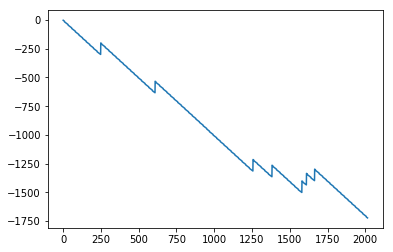

In [10]:
import itertools


class StrafingAndRandomlyShootingAgent(object):
    def __init__(self):
        self.strafes_and_shoots = itertools.cycle(np.concatenate([
            np.tile([LEFT, LEFT, LEFT, LEFT, LEFT, SHOOT], 20), 
            np.tile([RIGHT, RIGHT, RIGHT, RIGHT, RIGHT, SHOOT], 20)]))
        
    def act(self, observation, reward, done):
            return next(self.strafes_and_shoots)

env = create_env()

sares = list(play_episodes(env, StrafingAndRandomlyShootingAgent(), episode_count=10, outdir='tmp/random_strafing'))
plt.plot(np.cumsum(list(map(operator.attrgetter('reward'), sares))));

In [11]:
import itertools
collecting_agent = RandomAgent(env.action_space)
collecting_agent = StrafingAndRandomlyShootingAgent()

successes = itertools.islice(
    filter(lambda sar: sar.reward == 100, play_episodes(env, collecting_agent, episode_count=10000)),
    1000)

success_frames = np.array([sar.state for sar in successes])
success_frames.shape

(1000, 150, 200, 3)

In [12]:
sares = list(play_episodes(env, collecting_agent, episode_count=10))

rewards = np.array([sar.reward for sar in sares])
actions = np.array([sar.action for sar in sares])

miss_indexes, = np.where((actions[:delta_fire] == 1) & (rewards[np.abs(delta_fire):] != 100))
images = [sares[i].state for i in np.random.choice(miss_indexes, 10)]

miss_frames = np.array([sares[i].state for i in np.random.choice(miss_indexes, 1000)])

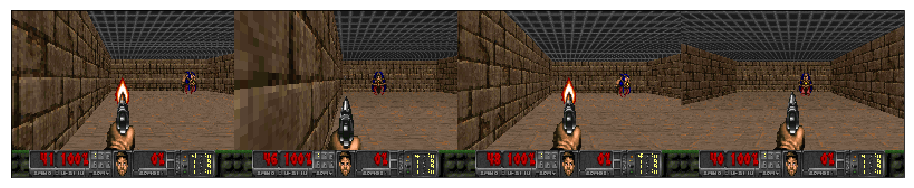

In [13]:
def to_small_frames(frames):
    return frames[:, 25:125, 100:-100]

def to_small_frames(frames):
    return frames

small_miss_frames = to_small_frames(miss_frames)
small_success_frames = to_small_frames(success_frames)

plt.figure(figsize=[16, 16])
show(np.hstack(small_miss_frames[:4]))

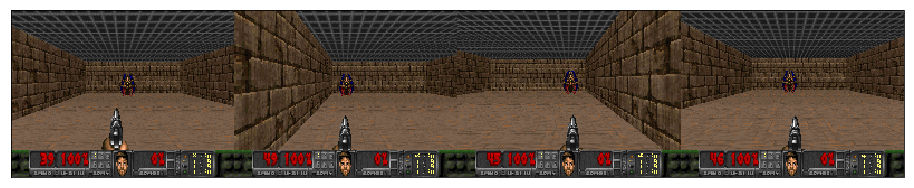

In [14]:
plt.figure(figsize=[16, 16])
show(np.hstack(small_success_frames[:4]))

## Learning when to shoot

In [15]:
import tensorflow as tf
from keras import backend as K

sess = tf.InteractiveSession()
K.set_session(sess)

Using TensorFlow backend.


In [16]:
n_samples = small_success_frames.shape[0] + small_miss_frames.shape[0]
permutated_indexes = np.random.permutation(np.arange(n_samples))

input_images = np.concatenate([
    small_success_frames,
    small_miss_frames])[permutated_indexes]

labels = np.hstack([
    np.ones(small_success_frames.shape[0]),
    np.zeros(small_miss_frames.shape[0])])[permutated_indexes]

print('{}/{} success/miss with shape {}'.format(labels.sum(dtype=int), (labels==0).sum(), (HEIGHT, WIDTH)))

1000/1000 success/miss with shape (150, 200)


In [17]:
from keras.layers import Dense, Convolution2D, Flatten, Activation
from keras.models import Sequential
from keras.optimizers import Adam

BATCH_SIZE = 128
N_EPOCHS = 4
n_variable_samples = None

model = Sequential()

model.add(Convolution2D(
    4, nb_row=6, nb_col=6, border_mode='valid', 
    input_shape=[HEIGHT, WIDTH, 3], dim_ordering='tf'))
model.add(Activation('relu'))

model.add(Convolution2D(1, nb_row=2, nb_col=2))
model.add(Activation('relu'))
model.add(Flatten())
#model.add(Dense(16))
#model.add(Activation('relu'))
model.add(Dense(1, init='normal', activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Train on 1800 samples, validate on 200 samples
Epoch 1/4
1800/1800 [==============================] - 26s - loss: 3.0048 - acc: 0.6356 - val_loss: 1.1590 - val_acc: 0.7150

In [21]:
model.fit(input_images, labels, batch_size=BATCH_SIZE, nb_epoch=N_EPOCHS,
          verbose=1, validation_split=0.1)

Train on 1800 samples, validate on 200 samples
Epoch 1/4
1800/1800 [==============================] - 26s - loss: 0.2987 - acc: 0.8750 - val_loss: 0.3558 - val_acc: 0.8850

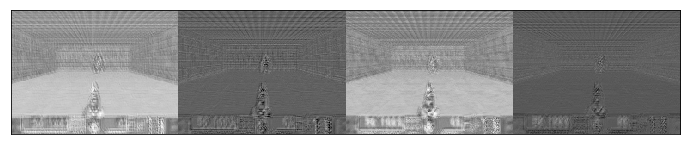

In [143]:
l = model.layers[0]

image_index = 300
image_activation_by_filters = l.call(input_images.astype(float)[[image_index]]).eval()

plt.figure(figsize=(12, 12))
plt.imshow(np.hstack(image_activation_by_filters.squeeze().swapaxes(0, 2).swapaxes(1, 2)),
                     cmap='Greys', interpolation='None');
plt.xticks([]); plt.yticks([]);

## Intelligent shooter agent

[2017-02-25 20:15:28,628] Making new env: ppaquette/DoomBasic-v0
[2017-02-25 20:15:28,645] DEPRECATION WARNING: env.spec.timestep_limit has been deprecated. Replace your call to `env.spec.timestep_limit` with `env.spec.tags.get('wrapper_config.TimeLimit.max_episode_steps')`. This change was made 12/28/2016 and is included in version 0.7.0
[2017-02-25 20:15:28,646] Clearing 8 monitor files from previous run (because force=True was provided)
[2017-02-25 20:15:28,976] Starting new video recorder writing to /Users/gui/Dev/rl-study/tmp/strafing_shooter/openaigym.video.2.1555.video000000.mp4
[2017-02-25 20:15:31,899] Starting new video recorder writing to /Users/gui/Dev/rl-study/tmp/strafing_shooter/openaigym.video.2.1555.video000001.mp4
[2017-02-25 20:15:39,779] Starting new video recorder writing to /Users/gui/Dev/rl-study/tmp/strafing_shooter/openaigym.video.2.1555.video000008.mp4
[2017-02-25 20:15:40,661] Finished writing results. You can upload them to the scoreboard via gym.upload('/Us

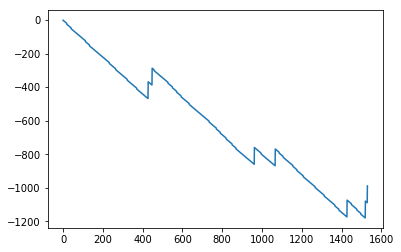

In [19]:
import itertools

SHOOT, LEFT, RIGHT = 1, 2, 3


class StrafingWithShootingModelAgent(object):
    def __init__(self, model):
        self.model = model
        self.strafes = itertools.cycle(np.concatenate([np.repeat(LEFT, 100), np.repeat(RIGHT, 100)]))
        
    def act(self, observation, reward, done):
        if model.predict(x=to_small_frames(np.array([observation])))[0] > .99:
            return SHOOT
        else:
            return next(self.strafes)

env = create_env()

sares = list(play_episodes(env, StrafingWithShootingModelAgent(model), episode_count=10, outdir='tmp/strafing_shooter'))
plt.plot(np.cumsum(list(map(operator.attrgetter('reward'), sares))));

In [20]:
n_episodes = 100
seed = 0

env = create_env()

sares = play_episodes(env, StrafingWithShootingModelAgent(model), episode_count=n_episodes, seed=seed)
print('StrafingWithShootingModelAgent average reward of {:.2f}'.format(sum(map(operator.attrgetter('reward'), sares))))

sares = play_episodes(env, StrafingAndRandomlyShootingAgent(), episode_count=n_episodes, seed=seed)
print('StrafingAndRandomlyShootingAgent average reward of {:.2f}'.format(sum(map(operator.attrgetter('reward'), sares))))

[2017-02-25 20:15:44,219] Making new env: ppaquette/DoomBasic-v0


StrafingWithShootingModelAgent average reward of -11639.00
StrafingAndRandomlyShootingAgent average reward of -13247.00
